In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
import numpy as np
import matplotlib.pyplot as plt

In [2]:
(x_train,_) , (x_test,_) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 1s 0us/step


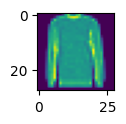

In [3]:
plt.figure(figsize=(1,1))
plt.imshow(x_train[45])

In [4]:
print("X_Train shape",x_train.shape)
print("X_Tset shape",x_test.shape)

X_Train shape (60000, 28, 28)
X_Tset shape (10000, 28, 28)


Scaling The Training Data




In [5]:
x_train = x_train/255
x_test = x_test/255

In [6]:
x_train.shape

(60000, 28, 28)

#Reshape the training data from 3D to 2D

In [7]:
x_train = x_train.reshape(len(x_train) , 28*28*1)
x_test = x_test.reshape(len(x_test) , 28*28*1)

In [8]:
print("X_Train shape",x_train.shape)
print("X_Tset shape",x_test.shape)

X_Train shape (60000, 784)
X_Tset shape (10000, 784)


#Start Model Building after scaling

In [9]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input,Conv2D,MaxPooling2D,UpSampling2D,Flatten,Reshape

In [10]:
input_layer = Input(shape=(28,28,1))

conv_en = Conv2D(32 , (3,3) , activation='relu' , padding='same', kernel_initializer='he_normal')(input_layer)
conv_en = MaxPooling2D((2,2) , padding='same')(conv_en)

conv_en = Conv2D(32 , (3,3) , activation='relu' , padding='same' )(conv_en)
conv_en = MaxPooling2D((2,2) , padding='same')(conv_en)

conv_en = Conv2D(4 , (3,3) , activation='relu' , padding='same' )(conv_en)
conv_en = MaxPooling2D((2,2) , padding='same')(conv_en)

conv_en = Flatten(name='bot')(conv_en)

conv_reshape = Reshape((4,4,4) , input_shape=(64,) , name='botNext0')(conv_en)

conv_dn = Conv2D(4 , (3,3) , activation='relu' , padding='same')(conv_reshape)
conv_dn = UpSampling2D((2,2))(conv_dn)

conv_dn = Conv2D(32 , (3,3) , activation='relu' , padding='same')(conv_dn)
conv_dn = UpSampling2D((2,2))(conv_dn)

conv_dn = Conv2D(32 , (3,3) , activation='relu' , padding='valid')(conv_dn)
conv_dn = UpSampling2D((2,2))(conv_dn)

conv_dn = Conv2D(1 , (3,3) , activation='sigmoid' , padding='same')(conv_dn)

ready_model = Model(inputs=input_layer , outputs=conv_dn)

In [11]:
ready_model.compile(
    optimizer=tf.keras.optimizers.SGD(learning_rate=0.09 , clipvalue=2.5),
    loss="binary_crossentropy",
    metrics=['accuracy']
)

In [12]:
ready_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 32)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 4)           1156  

Predict the test of model

In [13]:
x_train = x_train.reshape(x_train.shape[0] , 28 , 28 , 1)
x_test = x_test.reshape(x_test.shape[0] , 28 , 28 , 1)
print("x-train shape : ",x_train.shape)
print("x-test shape : ",x_test.shape)

x-train shape :  (60000, 28, 28, 1)
x-test shape :  (10000, 28, 28, 1)


In [14]:
ready_model.fit(
    x_train,
    x_train,
    epochs=100,
    verbose=2,
    batch_size=1024,
    shuffle=False,
    validation_split=0.1
)

Epoch 1/100
53/53 - 15s - loss: 0.6215 - accuracy: 0.4935 - val_loss: 0.6056 - val_accuracy: 0.4983 - 15s/epoch - 291ms/step
Epoch 2/100
53/53 - 2s - loss: 0.5882 - accuracy: 0.5025 - val_loss: 0.5612 - val_accuracy: 0.4983 - 2s/epoch - 29ms/step
Epoch 3/100
53/53 - 2s - loss: 0.5055 - accuracy: 0.4930 - val_loss: 0.4465 - val_accuracy: 0.4850 - 2s/epoch - 31ms/step
Epoch 4/100
53/53 - 2s - loss: 0.4209 - accuracy: 0.4905 - val_loss: 0.4108 - val_accuracy: 0.4974 - 2s/epoch - 29ms/step
Epoch 5/100
53/53 - 2s - loss: 0.3900 - accuracy: 0.4911 - val_loss: 0.3762 - val_accuracy: 0.4829 - 2s/epoch - 31ms/step
Epoch 6/100
53/53 - 2s - loss: 0.3785 - accuracy: 0.4916 - val_loss: 0.3844 - val_accuracy: 0.4972 - 2s/epoch - 31ms/step
Epoch 7/100
53/53 - 2s - loss: 0.3729 - accuracy: 0.4926 - val_loss: 0.3721 - val_accuracy: 0.4809 - 2s/epoch - 30ms/step
Epoch 8/100
53/53 - 2s - loss: 0.3684 - accuracy: 0.4932 - val_loss: 0.3756 - val_accuracy: 0.4977 - 2s/epoch - 31ms/step
Epoch 9/100
53/53 - 2

#Accuracy : 50%

In [15]:
prediction = ready_model.evaluate(x_test,x_test)

313/313 [==============================] - 2s 4ms/step - loss: 0.3088 - accuracy: 0.5040


In [16]:
test_predict = ready_model.predict(x_test)

313/313 [==============================] - 1s 3ms/step


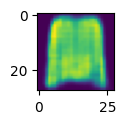

In [27]:
plt.figure(figsize=(1,1))
plt.imshow(test_predict[233])

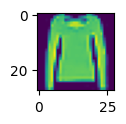

In [28]:
plt.figure(figsize=(1,1))
plt.imshow(x_test[233])

## Noisy Data

In [29]:
# Create Noisy Data
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)
print(x_train_noisy.shape,x_test_noisy.shape )

(60000, 28, 28, 1) (10000, 28, 28, 1)


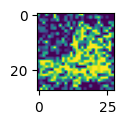

In [30]:
plt.figure(figsize=(1,1))
plt.imshow(x_train_noisy[0])

In [31]:
input_layer = Input(shape=(28,28,1))

conv_en = Conv2D(32 , (3,3) , activation='relu' , padding='same', kernel_initializer='he_normal')(input_layer)
conv_en = MaxPooling2D((2,2) , padding='same')(conv_en)

conv_en = Conv2D(32 , (3,3) , activation='relu' , padding='same' )(conv_en)
conv_en = MaxPooling2D((2,2) , padding='same')(conv_en)

conv_en = Conv2D(4 , (3,3) , activation='relu' , padding='same' )(conv_en)
conv_en = MaxPooling2D((2,2) , padding='same')(conv_en)

conv_en = Flatten(name='bot')(conv_en)

conv_reshape = Reshape((4,4,4) , input_shape=(64,) , name='botNext0')(conv_en)

conv_dn = Conv2D(4 , (3,3) , activation='relu' , padding='same')(conv_reshape)
conv_dn = UpSampling2D((2,2))(conv_dn)

conv_dn = Conv2D(32 , (3,3) , activation='relu' , padding='same')(conv_dn)
conv_dn = UpSampling2D((2,2))(conv_dn)

conv_dn = Conv2D(32 , (3,3) , activation='relu' , padding='valid')(conv_dn)
conv_dn = UpSampling2D((2,2))(conv_dn)

conv_dn = Conv2D(1 , (3,3) , activation='sigmoid' , padding='same')(conv_dn)

ready_model = Model(inputs=input_layer , outputs=conv_dn)

In [32]:
ready_model.compile(
    optimizer=tf.keras.optimizers.SGD(learning_rate=0.09 , clipvalue=2.5),
    loss="binary_crossentropy",
    metrics=['accuracy']
)

In [33]:
ready_model.fit(
    x_train_noisy,
    x_train,
    epochs=100,
    verbose=2,
    batch_size=1024,
    shuffle=False,
    validation_split=0.1
)

Epoch 1/100
53/53 - 3s - loss: 0.5731 - accuracy: 0.4905 - val_loss: 0.5193 - val_accuracy: 0.4664 - 3s/epoch - 59ms/step
Epoch 2/100
53/53 - 2s - loss: 0.5179 - accuracy: 0.4799 - val_loss: 0.5145 - val_accuracy: 0.4392 - 2s/epoch - 30ms/step
Epoch 3/100
53/53 - 2s - loss: 0.4919 - accuracy: 0.4805 - val_loss: 0.4695 - val_accuracy: 0.4985 - 2s/epoch - 32ms/step
Epoch 4/100
53/53 - 2s - loss: 0.4500 - accuracy: 0.4859 - val_loss: 0.4041 - val_accuracy: 0.4881 - 2s/epoch - 33ms/step
Epoch 5/100
53/53 - 2s - loss: 0.4141 - accuracy: 0.4898 - val_loss: 0.3974 - val_accuracy: 0.4749 - 2s/epoch - 30ms/step
Epoch 6/100
53/53 - 2s - loss: 0.3873 - accuracy: 0.4924 - val_loss: 0.3889 - val_accuracy: 0.4983 - 2s/epoch - 31ms/step
Epoch 7/100
53/53 - 2s - loss: 0.3765 - accuracy: 0.4939 - val_loss: 0.3728 - val_accuracy: 0.4816 - 2s/epoch - 30ms/step
Epoch 8/100
53/53 - 2s - loss: 0.3694 - accuracy: 0.4945 - val_loss: 0.3731 - val_accuracy: 0.4985 - 2s/epoch - 30ms/step
Epoch 9/100
53/53 - 2s -

In [35]:
accuracy = ready_model.evaluate(x_test_noisy , x_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.3216 - accuracy: 0.5032


In [37]:
encoded_images = ready_model.predict(x_test_noisy)

313/313 [==============================] - 1s 2ms/step


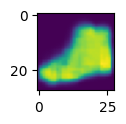

In [46]:
plt.figure(figsize=(1,1))
plt.imshow(encoded_images[1440])

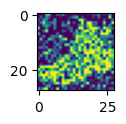

In [47]:
plt.figure(figsize=(1,1))
plt.imshow(x_test_noisy[1440])